## 4(a)

In [1]:
import numpy as np
import pandas as pd

wine = pd.read_csv("winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 4(b)

In [2]:
from sklearn.model_selection import train_test_split

X = wine.drop("quality", axis = 1)
y = wine["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

## 4\(c\)

* Here, I calculate the least squares solution using the least squares formula ((X\^T)X)\^(-1)(X\^T)y.

In [4]:
def train_slr(X, y):
    data_matrix = np.array(pd.concat([pd.Series(1, index = X.index, name = 'Constant'), X], axis=1))
    return np.linalg.inv(data_matrix.T @ data_matrix) @ (data_matrix.T) @ y

## 4(d)

* I calcutate the predictions using the data matrix multiplied by the least squares solution beta.

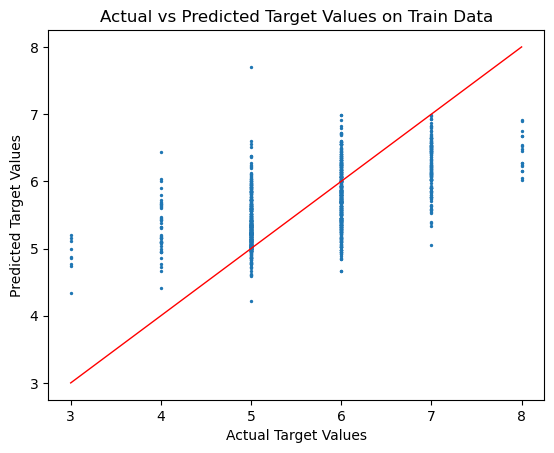

In [5]:
beta = train_slr(X_train, y_train)
y_train_pred = pd.concat([pd.Series(1, index = X_train.index, name = 'Constant'), X_train], axis=1) @ beta

import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_pred, s = 2)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values on Train Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=1)  # Identity line
plt.show()

* The plot shows the relationship between actual target values and the target values that are predicted in the simple linear regression model. We want the points in the scatterplot to lie on or close to the red line because this indicates that the model predictions are closer to the true values.

## 4(e)

* I calculate the RMSE by taking the square root of the mean of the prediction minus the actual.

In [6]:
def rmse(X, y, beta):
    data_matrix = np.array(pd.concat([pd.Series(1, index = X.index, name = 'Constant'), X], axis=1))
    return np.sqrt(np.mean((data_matrix @ beta - y)**2))

beta = train_slr(X_train, y_train)
print("Train RMSE:", rmse(X_train, y_train, beta))
print("Test RMSE:", rmse(X_test, y_test, beta))

Train RMSE: 0.649405862720735
Test RMSE: 0.6355993643465887


## 4(f)

* I use stochastic gradient descent to calculate the appropriate weights.

In [17]:
def lms(X, y, stepsize = 0.0001, n_iterations=100000):
    
    data_matrix = pd.concat([pd.Series(1, index = X.index, name = 'Constant'), X], axis=1)

    # initialize random weights
    np.random.seed(123)
    weights = np.random.rand(data_matrix.shape[1])
    
    for _ in range(n_iterations):
        # update the weights using SGD
        n = np.random.randint(0, data_matrix.shape[0])
        weights = weights + stepsize * (y[n] - weights @ np.array(data_matrix.iloc[n, :])) * np.array(data_matrix.iloc[n, :])
    
    return weights

weights_lms = lms(X_train, y_train)

## 4(g)

In [18]:
print("Train RMSE:", rmse(X_train, y_train, weights_lms))
print("Test RMSE:", rmse(X_test, y_test, weights_lms))

Train RMSE: 0.6872434486788287
Test RMSE: 0.6526489204912195


* The RMSE is very similar to the RMSE of t